In [1]:
import os
import cv2
import numpy as np
import math
from PIL import Image

In [2]:
def to_image(pdf_path):
  import fitz
  doc = fitz.open(pdf_path)
  images = []
  for index in range(0, doc.page_count):
    page = doc.load_page(index)
    pix = page.get_pixmap()
    img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
    images.append(img)
  return images

In [3]:
images = to_image('samples/paraclis.pdf')

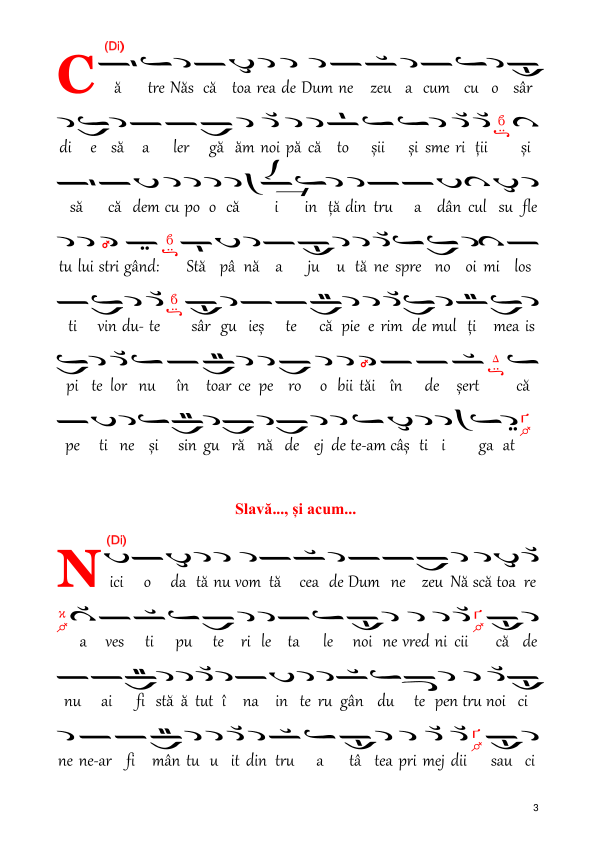

In [4]:
images[2]

In [5]:
pil_image = images[2].convert('RGB') 
# Convert RGB to BGR 
image = np.array(pil_image)[:, :, ::-1].copy() 

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
height, width = gray.shape
print(f'h={height}, w={width}')

thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

h=842, w=596


In [6]:
output = cv2.connectedComponentsWithStats(thresh, 8, cv2.CV_32S)
(numLabels, labels, stats, centroids) = output

In [7]:
print(stats)

[[     0      0    596    842 474461]
 [   105     41      3     12     14]
 [   109     41      8      9     37]
 ...
 [    99    762      3      4      6]
 [   165    762      3      4      6]
 [   534    804      4      7     15]]


596
842


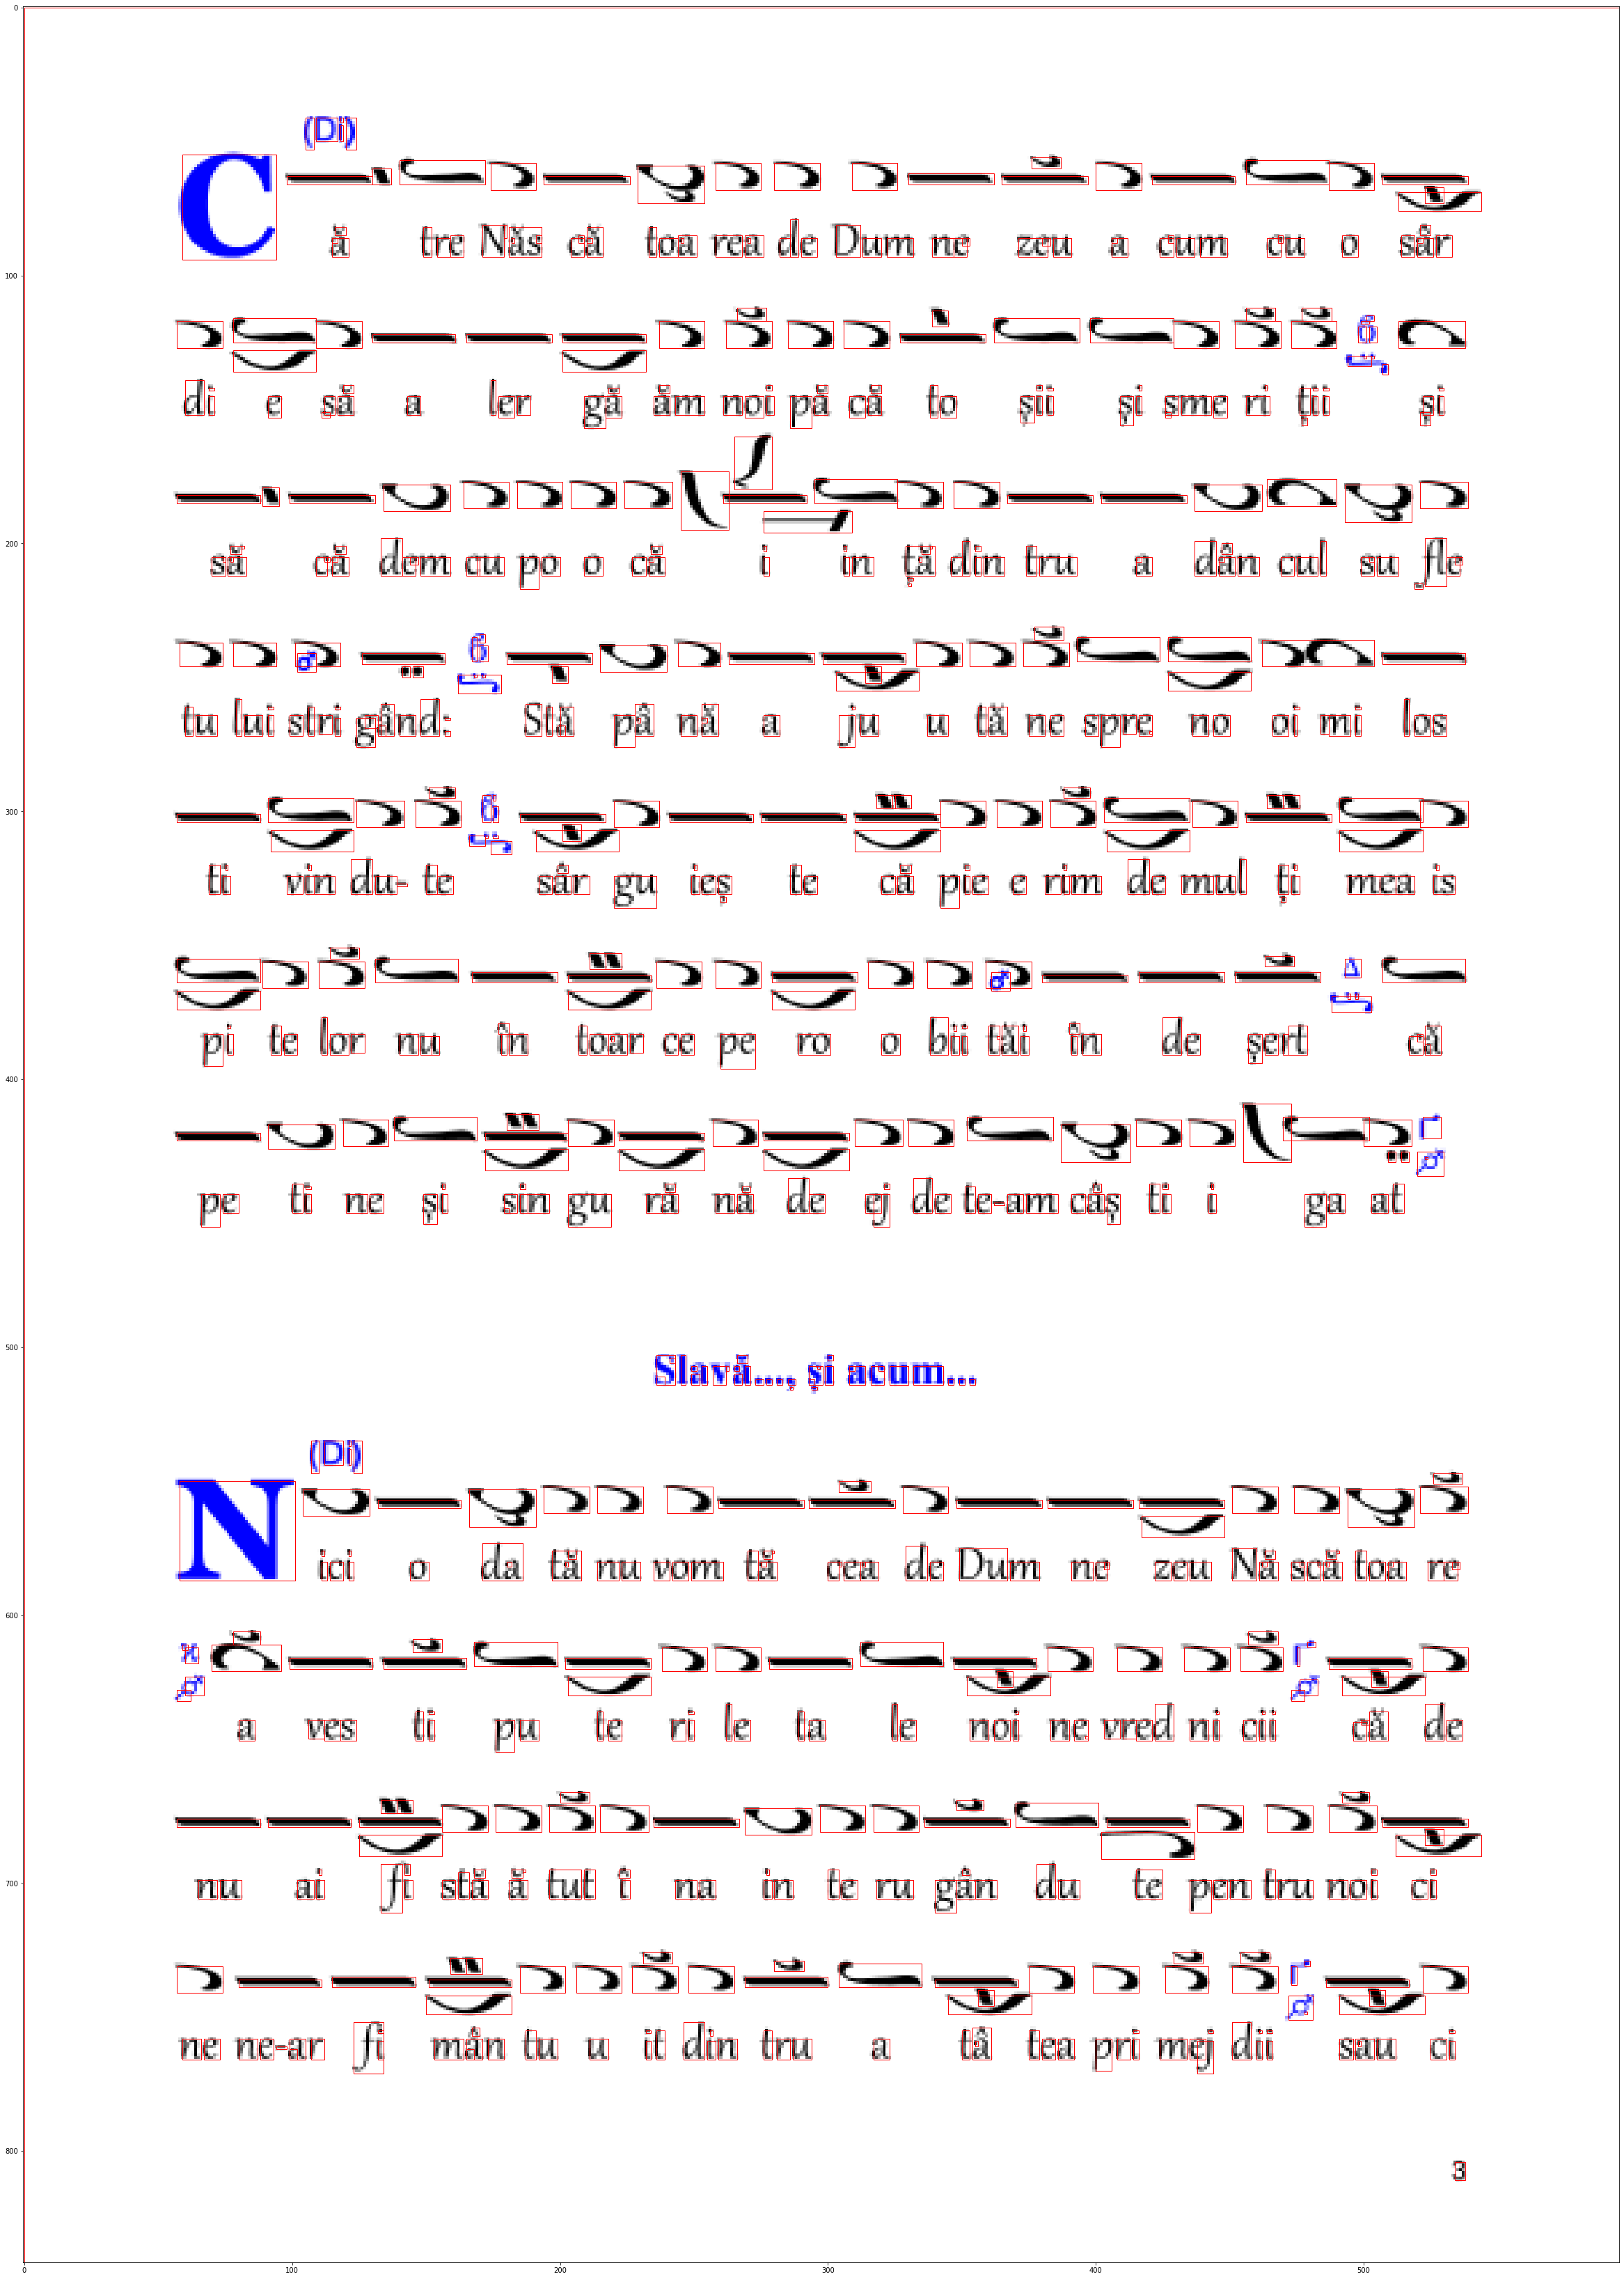

In [15]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create figure and axes
fig, ax = plt.subplots(figsize=(height / 10, width / 10))

# Display the image
ax.imshow(image)

# Create a Rectangle patch
max_x, max_y = 0, 0
for (x, y, w, h, a) in stats:
  max_x = max(max_x, x + w)
  max_y = max(max_y, y + h)
  rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
  ax.add_patch(rect)
print(max_x)
print(max_y)
plt.show()